In [16]:
from matplotlib import animation, rc
from IPython.display import HTML
from MatrixLattice import *
import numpy as np
import matplotlib.pyplot as plt
import algorithms as alg
import random

# The Ising model

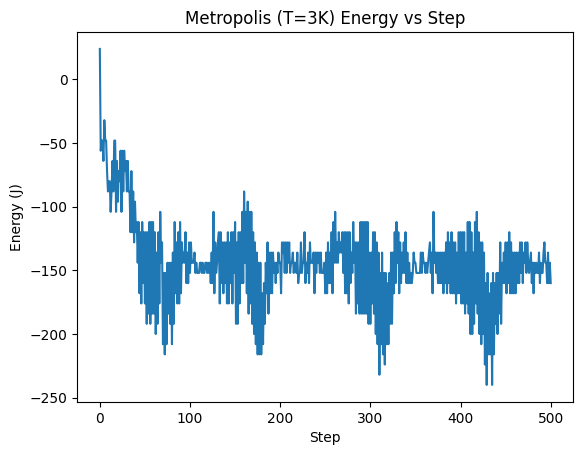

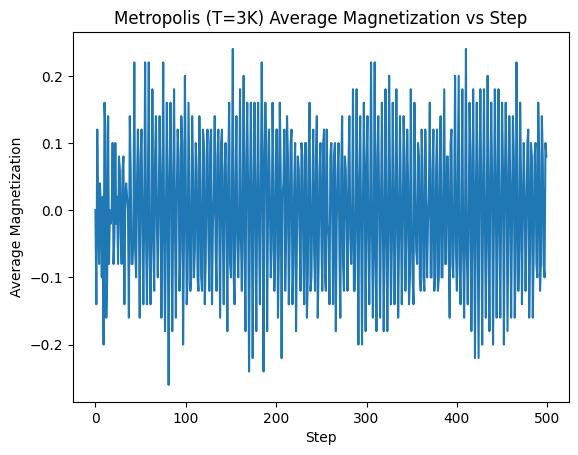

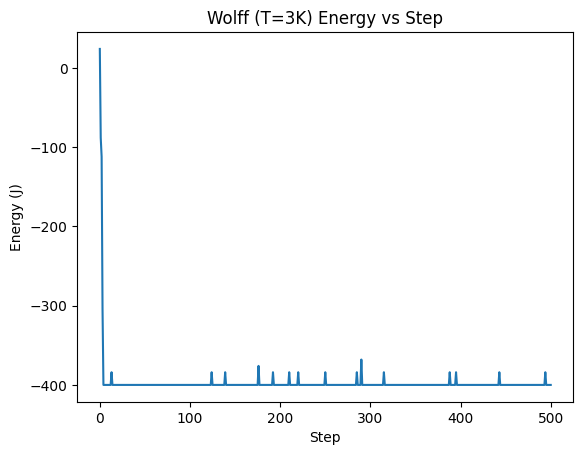

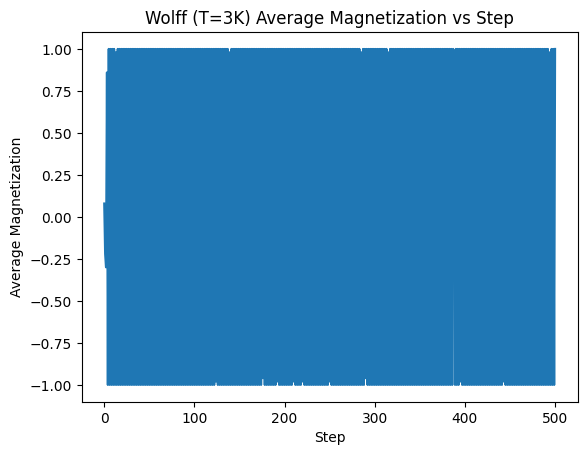

In [35]:
param_N = 10
param_T = 3
param_kB = 1#1.380649E-23
param_J = 1
param_ncycles = 500

#
# Create the lattice using the parameters
#
globalLattice = MatrixLattice(param_J, param_N)

#
# Run the algorithms on the lattice
#
energies_m, mag_m, clones= alg.runMetropolis(globalLattice, plt, param_ncycles, param_T, param_kB)
energies_w, mag_w, clones = alg.runWolff(globalLattice, plt, param_ncycles, param_T, param_J)

# Animate

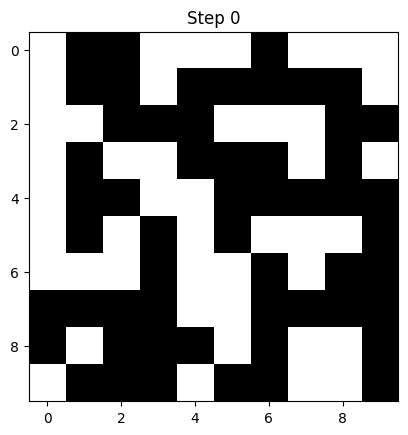

In [24]:

def animate_metropolis(lattice, kB, T, nCycles):
    """Make the plot itself"""
    fig, ax = plt.subplots()

    def update(frame):
        nonlocal E
        """Iterate over all the lattice points"""
        for i in range(lattice.getN()):
            """Flip the spin of some randome lattice point and calculate deltaE"""
            lattice.flipSpin(random.randint(0, lattice.getN() - 1))
            E1 = lattice.getE()
            deltaE = E1 - E
            """Decide if we should accept the flip"""
            if (deltaE < 0 or (random.random() < np.exp(-deltaE / (kB * T)))):
                E = E1

        ax.clear()
        """Display current lattice frame"""
        ax.imshow(lattice._lattice, cmap='binary', interpolation='nearest')
        ax.set_title(f"Step {frame}")
        return ax

    E = lattice.getE()
    """make animation"""
    ani = animation.FuncAnimation(fig, update, frames=nCycles, interval=200, repeat=False)
    return ani

lattice = MatrixLattice(param_J, param_N, c=param_N)

ani = animate_metropolis(lattice, param_kB, param_T, param_ncycles)
"""Display using HTML"""
HTML(ani.to_jshtml())

In [19]:
def animate_wolff(lattice, beta, T, nCycles):
    fig, ax = plt.subplots()
    ax.set_xticks([])
    ax.set_yticks([])

    def update(frame):
        nonlocal energies  # Declare energies as non-local variable
        curr = random.randint(0, lattice.getN() - 1)  # Choose a random initial point

        cluster = [0 for _ in range(lattice.getN())]  # Create an array to track the cluster
        activated = [0 for _ in range(lattice.getN())]  # Create an array to track activated sites

        cluster[curr] = 1  # Add the initial point to the cluster
        activate_links(curr, cluster, activated)  # Activate links recursively

        for i in range(lattice.getN()):  # Loop through the lattice and flip spins in the cluster
            if cluster[i]:
                lattice.flipSpin(i)

        E = lattice.getE()  # Get the energy of the lattice
        energies.append(E)

        ax.clear()
        ax.imshow(lattice._lattice, cmap='binary', interpolation='nearest')
        ax.set_title(f"Step {frame}")
        return ax

    energies = []  # Initialize energies array
    lattice.generateLattice()  # Generate the lattice
    ani = animation.FuncAnimation(fig, update, frames=nCycles, interval=200, repeat=False)
    return ani

# Example usage
lattice = MatrixLattice(param_N, param_N, param_J)
ani = animate_wolff(lattice, param_beta, param_T, param_ncycles)
HTML(ani.to_jshtml())

TypeError: 'float' object cannot be interpreted as an integer